# Lección 16 - Discretización

In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Create Data

Agregar elementos a un intervalo

In [104]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [105]:
bins = [18, 25, 35, 60, 100]

In [106]:
age_categories = pd.cut(ages,bins)

In [107]:
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [108]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
data = pd.DataFrame(np.random.standard_normal((100, 4)))

In [110]:
data.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.019255,-0.042095,-0.016275,-0.014444
std,0.953476,1.124577,0.991706,1.045112
min,-2.816387,-2.892726,-2.051206,-3.167184
25%,-0.680032,-0.829588,-0.799829,-0.573219
50%,-0.019929,0.049299,0.008562,-0.009936
75%,0.648222,0.695049,0.577366,0.734977
max,2.524395,2.397501,2.294192,2.069671


## Busqueda y Eliminación de Outliers

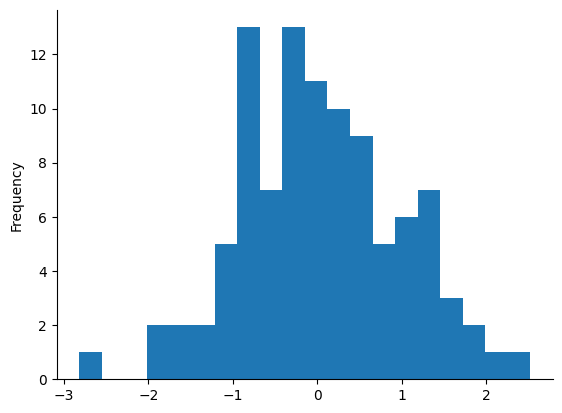

In [ ]:
data[0].plot(kind="hist", bins=20, title=0)
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

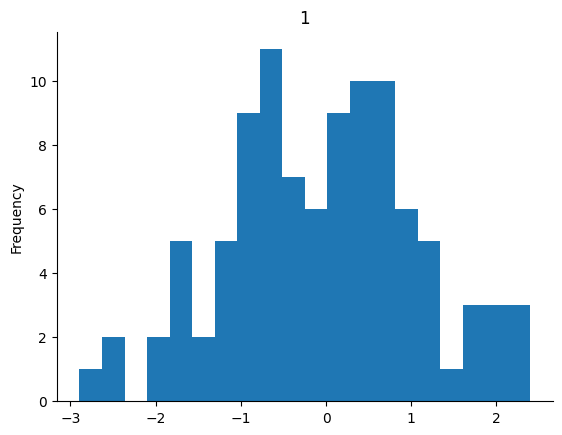

In [ ]:
data[1].plot(kind="hist", bins=20, title=1)
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

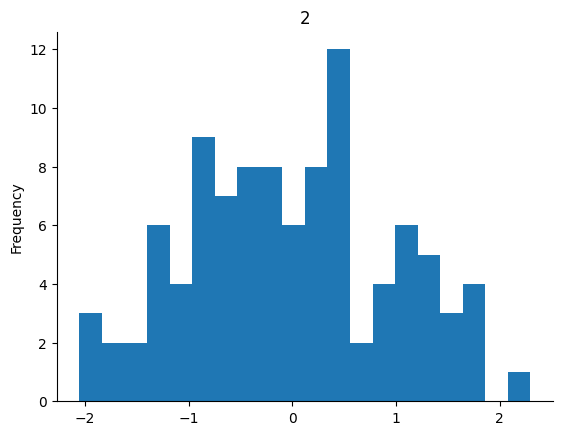

In [ ]:
data[2].plot(kind="hist", bins=20, title=2)
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

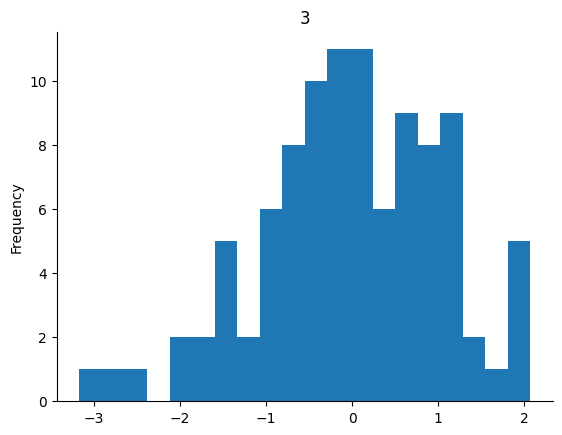

In [ ]:
data[3].plot(kind="hist", bins=20, title=3)
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

Lista de OUTLIERS

In [117]:
data[(data.abs() > 2).any(axis="columns")]

,0,1,2,3
2,-2.816387,-1.564996,-0.521224,0.841082
11,0.991035,-2.462582,1.113850,0.191049
14,0.433545,0.101936,1.415594,2.069671
19,-0.726496,-0.697083,-2.051206,-0.160631
23,2.524395,2.214595,-0.004939,-0.358874
37,-0.519223,2.124519,-1.365991,-0.128371
42,-0.293039,1.287883,1.701337,-2.830331
47,-0.244488,-2.892726,-0.121235,1.485042
51,0.488443,-0.272288,1.193992,-3.167184
65,2.232458,-1.635369,0.022063,-0.390833


Eliminamos uno de ellos, el indice puede variar de acuerdo a la tabla anterior

In [118]:
data2 = data.drop([2])

In [119]:
data2[(data2.abs() > 2).any(axis="columns")]

,0,1,2,3
11,0.991035,-2.462582,1.113850,0.191049
14,0.433545,0.101936,1.415594,2.069671
19,-0.726496,-0.697083,-2.051206,-0.160631
23,2.524395,2.214595,-0.004939,-0.358874
37,-0.519223,2.124519,-1.365991,-0.128371
42,-0.293039,1.287883,1.701337,-2.830331
47,-0.244488,-2.892726,-0.121235,1.485042
51,0.488443,-0.272288,1.193992,-3.167184
65,2.232458,-1.635369,0.022063,-0.390833
70,-0.316564,2.397501,-2.009510,-0.239249


## Dummies

In [ ]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"], "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [122]:
pd.get_dummies(df["key"])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [125]:
pd.get_dummies(df["key"], prefix="this")

,this_a,this_b,this_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [123]:
pd.get_dummies(df["data1"])

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [126]:
# create dataset
df = pd.DataFrame(
    {
        "Temperature": ["Hot", "Cold", "Warm", "Cold"],
    }
)

# display dataset
print(df)

# create dummy variables
pd.get_dummies(df)

  Temperature
0         Hot
1        Cold
2        Warm
3        Cold


,Temperature_Cold,Temperature_Hot,Temperature_Warm
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0


In [127]:
# create dataset
s = pd.Series(list("abca"))

# display dataset
print(s)

# create dummy variables
pd.get_dummies(s)

0    a
1    b
2    c
3    a
dtype: object


,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
